In [6]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [7]:
ls

MyDrive/  Shareddrives/


In [8]:
cd/gdrive/MyDrive/alignment_chk/

/gdrive/MyDrive/alignment_chk


In [9]:
ls

test/  train/


In [10]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
import keras as k
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [11]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [12]:
train_generator = train_datagen.flow_from_directory(
    '/gdrive/MyDrive/alignment_chk/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 239 images belonging to 2 classes.


In [13]:
test_generator = train_datagen.flow_from_directory(
     '/gdrive/MyDrive/alignment_chk/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 101 images belonging to 2 classes.


Found 340 files belonging to 2 classes.


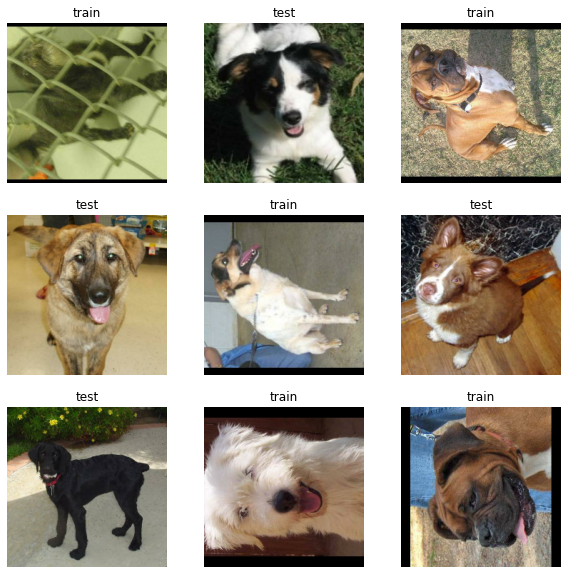

In [14]:
train_dataset = image_dataset_from_directory('/gdrive/MyDrive/alignment_chk/',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [1]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [5]:
vgg = VGG19(input_tensor=k.Input(shape=(224,224,3)),
            weights='imagenet',
            include_top=False,
            )

for models in vgg.layers[:-1]:
      models.trainable= False
model = k.models.Sequential()
model.add(vgg)
model.add(k.layers.Flatten())
model.add(k.layers.Dense(4, activation='softmax'))
print(model.summary())

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4)                 100356    
                                                                 
Total params: 20,124,740
Trainable params: 100,356
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [15]:
model.compile(optimizer="adam", loss=k.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [20]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
8/8 [==============================] - 220s 28s/step - loss: 0.4487 - accuracy: 0.8159 - val_loss: 0.8580 - val_accuracy: 0.4950
Epoch 2/10
8/8 [==============================] - 219s 28s/step - loss: 0.5153 - accuracy: 0.7490 - val_loss: 0.9925 - val_accuracy: 0.4158
Epoch 3/10
8/8 [==============================] - 216s 29s/step - loss: 0.4108 - accuracy: 0.8159 - val_loss: 0.7592 - val_accuracy: 0.5248
Epoch 4/10
8/8 [==============================] - 219s 28s/step - loss: 0.3980 - accuracy: 0.8159 - val_loss: 0.9476 - val_accuracy: 0.4653
Epoch 5/10
8/8 [==============================] - 218s 28s/step - loss: 0.4692 - accuracy: 0.7824 - val_loss: 1.1712 - val_accuracy: 0.3762
Epoch 6/10
8/8 [==============================] - 218s 30s/step - loss: 0.4462 - accuracy: 0.7782 - val_loss: 0.9325 - val_accuracy: 0.4059
Epoch 7/10
8/8 [==============================] - 217s 28s/step - loss: 0.4697 - accuracy: 0.7490 - val_loss: 0.8140 - val_accuracy: 0.5545
Epoch 8/10
8/8 [====

In [24]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 65s 15s/step - loss: 0.7794 - accuracy: 0.5644


[0.7794460654258728, 0.5643564462661743]

In [25]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [26]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
  
    if i == test_generator.samples // 32 + 1:
        break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


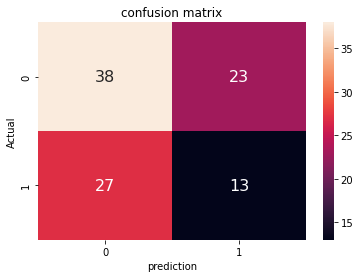

In [27]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [28]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        61
         1.0       0.36      0.33      0.34        40

    accuracy                           0.50       101
   macro avg       0.47      0.47      0.47       101
weighted avg       0.50      0.50      0.50       101



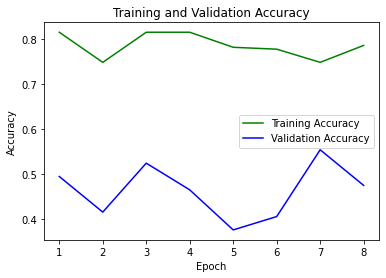

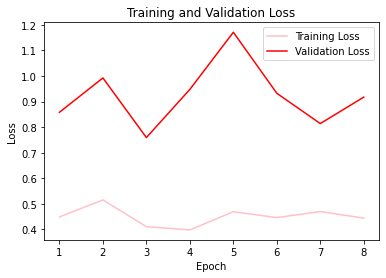

In [29]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
model.save('alignment_chk_VGG19.h5')